

# BACKGROUND INFORMATION

* HR analytics is a process of collecting and analyzing data about people at work. It aims to answer critical questions and make data-driven decisions that improve the organization's workforce and business performance. 
* HR analytics can also be called people analytics, workforce analytics, or talent analytics. 
* HR analytics can help with managing employee behavior, performance, productivity, engagement, development, and interactions. It can also help with hiring, firing, and promoting employees.

Promotions are announced after the evaluation and this leads to delay in transition to new roles.

The company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.


**OBJECTIVES**

* Analyze the provided data to identify different factors that drive promotion
* Do EDA on the dataset
* Build a model that can help predict promotion
    
**RESEARCH QUESTIONS**
* Does age affect the promotion of an employee?
* What is the age distribution of employees in the departments?
* What factors contribute to promotion of an employee?
* Which gender is likely to be promoted?
* Education level of employees per departments.


**DATASET**

The data contains demographic details, work-related metrics and promotion tag.
    
* employee_id: Unique ID for employee
* department: Department of employee
* region: Region of employment (unordered)
* education: Education Level
* gender: Gender of Employee
* recruitment_channel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won?: if awards won during previous year then 1 else 0
* avg_ training_ score: Average score in current training evaluations
* is_promoted: (Target) Recommended for promotion

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Overview of the dataset 

In [ ]:
#Loading datasets
train_df = pd.read_csv('/kaggle/input/hr-ana/train.csv')
test_df = pd.read_csv('/kaggle/input/hr-ana/test.csv')

In [4]:
#View first five rows of the dataset
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [5]:
#View last five rows of the dataset
train_df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49,0


In [6]:
#Shape of the dataset
train_df.shape

(54808, 13)

In [7]:
test_df.shape

(23490, 12)

In [8]:
#Checking the data types in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


**Observations**
* There are 54808 rows and 13 columns
* There are null values in the dataset
* awards_won? column is not named correctly

In [9]:
#Summary Statistics
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


**Observations**
* Age of the employee range is 20yrs - 60 yrs and the average age of the employees is 34yrs
* The length of service of an employee ranges from 1 year to 37 years
* The average training score ranges from 39 to 99 and the average is 63
* The percentage of promoted employees is 8.5%

In [10]:
train_df.describe(include=['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


**Observations**
* Sales & Marketing department has the highest number of employees
* Most employees are from region_2
* Most of the employees have Bachelor's degree
* 70% of the employees are men
* 56% of the employees are recruited from other rectruitment channels

<AxesSubplot:>

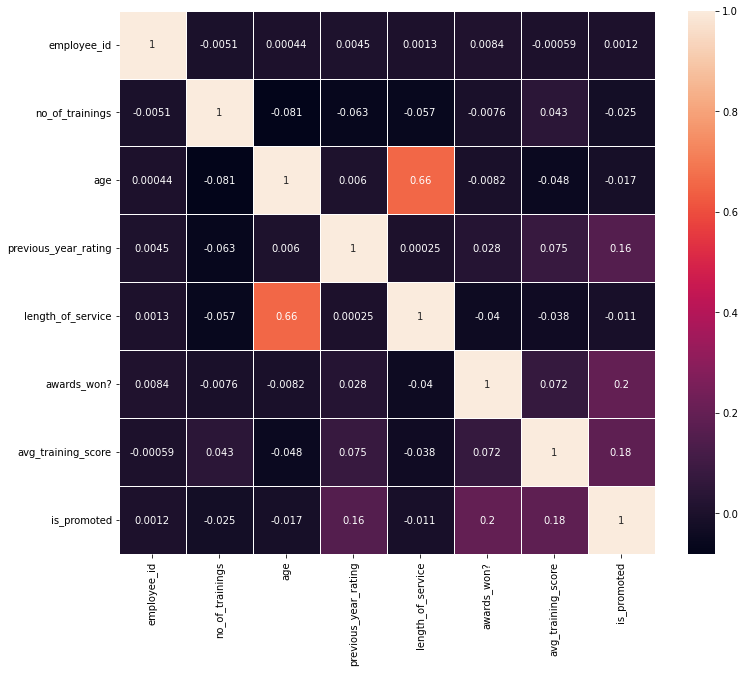

In [11]:
#Plotting correlation
plt.figure(figsize = (12, 10))
sns.heatmap(train_df.corr(), annot=True, square=False, linewidth=0.8)

**Observations**
* Some of the variables are correlated like age and length of service (0.66)
* There is correlation between awards won and being promoted which is 0.2

# Expolatory Data Analysis (EDA)

In [12]:
train = train_df.copy()
test = test_df.copy()

In [13]:
#Column names
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

### Target Variable 

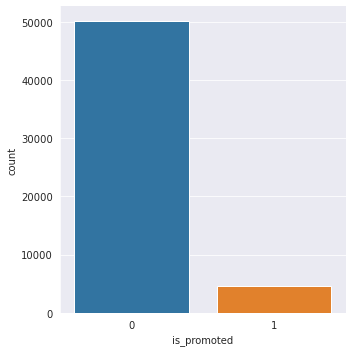

In [14]:
#Plotting target Variable
sns.set_style('darkgrid')
sns.catplot(x ='is_promoted', kind='count', data=train)
plt.show()

**Observation**
* The number of promoted employees is less than the unprommoted employees

### Data Distribution 

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'awards_won?'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>]],
      dtype=object)

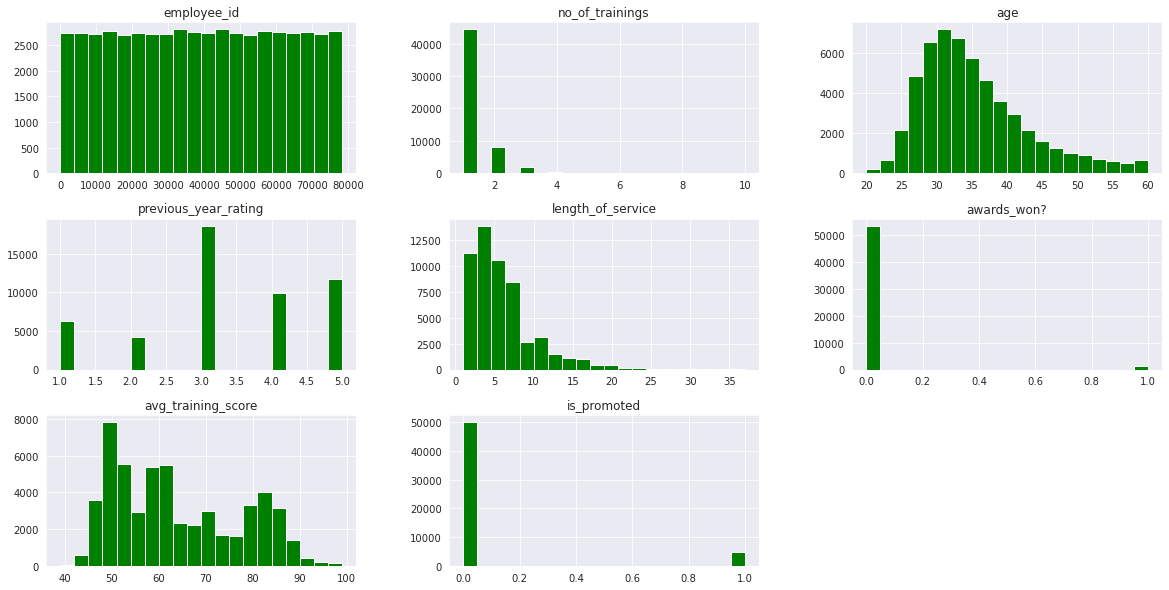

In [15]:
#Data distribution
train.hist(bins = 20, figsize = (20,10), color = 'g')

**Observations**
* **Age**
1.    The mean is greater than the median, i.e mean is 35 and median 33
1.    Age of the employees ranges from 20 years to 60 years
1.    Most of the employees ages range from 30 yrs and 40 yrs

* **Length of Service**
1.    Mean(5.8) > median(5.0)
1.    Length of service ranges from 1 yr to 37 yrs
1.    The length of service of most employees is centered between 1 and 6 yrs
 
 
* **Average training score** 
1.   Mean(63.38) > median(60.00)
1.   Average training score ranges from 39 and 99



### Department

<Figure size 864x720 with 0 Axes>

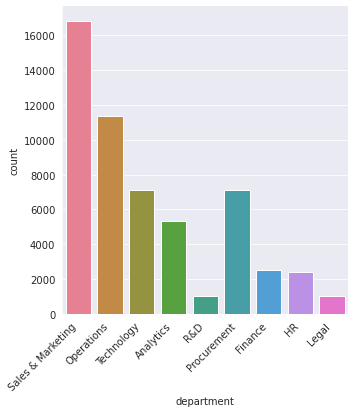

In [16]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='department', kind='count', data=train, palette='husl')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Observations**
1. Top three departments with the most number of employees are:
* Sales & Marketing
* Operations
* Procurement

2. R&D department has the lowest number of employees in the organisation

<Figure size 864x720 with 0 Axes>

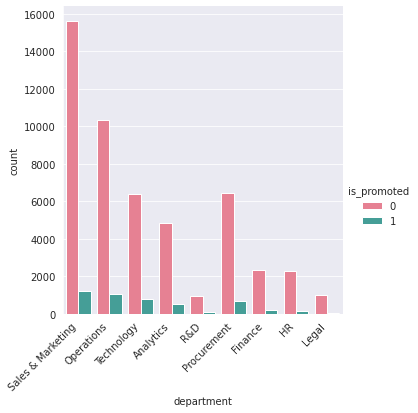

In [17]:
plt.figure(figsize=(12, 10))
sns.catplot(x='department', hue='is_promoted', kind='count', data=train, palette='husl')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [18]:
train.groupby('department')['is_promoted'].sum()

department
Analytics             512
Finance               206
HR                    136
Legal                  53
Operations           1023
Procurement           688
R&D                    69
Sales & Marketing    1213
Technology            768
Name: is_promoted, dtype: int64

**Education**

<Figure size 864x720 with 0 Axes>

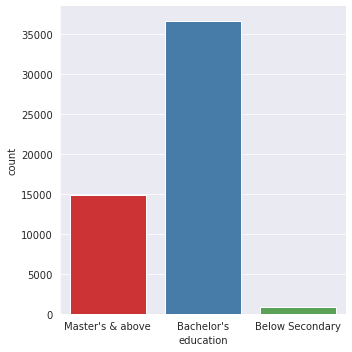

In [19]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='education', kind='count', data=train, palette='Set1')
plt.show()

**Observations**
* More than 35000 employees hold a bachelor's degree
* At least 15000 employees have a Master's and Phd


<Figure size 864x720 with 0 Axes>

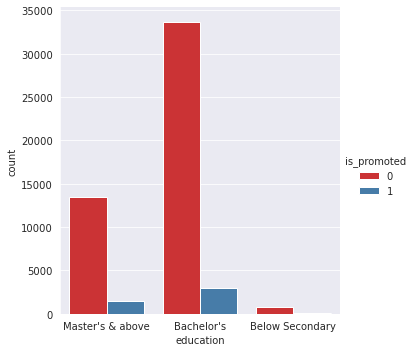

In [20]:
plt.figure(figsize=(12, 10))
sns.catplot(x='education', hue='is_promoted', kind='count', data=train, palette='Set1')
plt.show()

In [21]:
train.groupby('education')['is_promoted'].sum()

education
Bachelor's          3008
Below Secondary       67
Master's & above    1471
Name: is_promoted, dtype: int64

**Gender**

<Figure size 864x720 with 0 Axes>

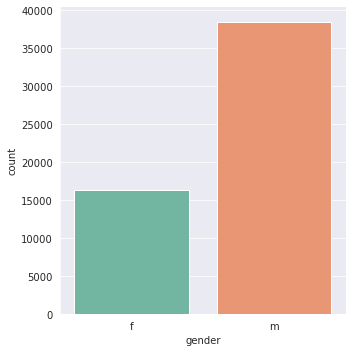

In [22]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='gender', kind='count', data=train, palette='Set2')
plt.show()

**Observation**
* Male employees account for more than 35000 employees in the company 
* The number of female employees is slightly above 15000

<Figure size 864x720 with 0 Axes>

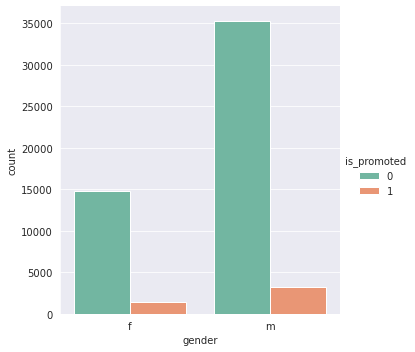

In [23]:
plt.figure(figsize=(12, 10))
sns.catplot(x='gender', hue='is_promoted', kind='count', data=train, palette='Set2')
plt.show()

In [24]:
train.groupby('gender')['is_promoted'].sum()

gender
f    1467
m    3201
Name: is_promoted, dtype: int64

**Recruitment Channel**

<Figure size 864x720 with 0 Axes>

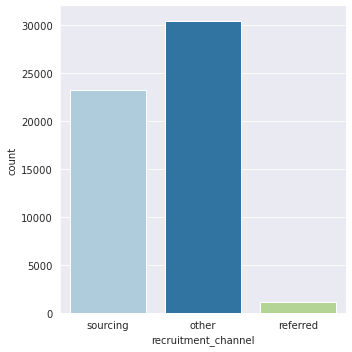

In [25]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='recruitment_channel', kind='count', data=train, palette='Paired')
plt.show()

**Observation**
* Most of the employees are recruited using other recruitment 

<Figure size 864x720 with 0 Axes>

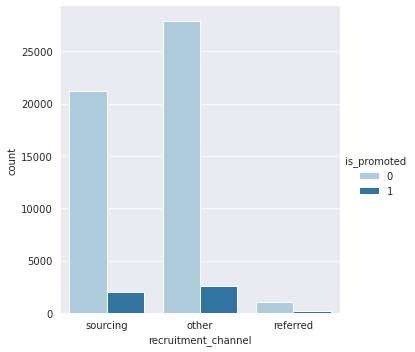

In [26]:
plt.figure(figsize=(12, 10))
sns.catplot(x='recruitment_channel', hue='is_promoted', kind='count', data=train, palette='Paired')
plt.show()

In [27]:
train.groupby('recruitment_channel')['is_promoted'].sum()

recruitment_channel
other       2556
referred     138
sourcing    1974
Name: is_promoted, dtype: int64

**No of trainings**

<Figure size 864x720 with 0 Axes>

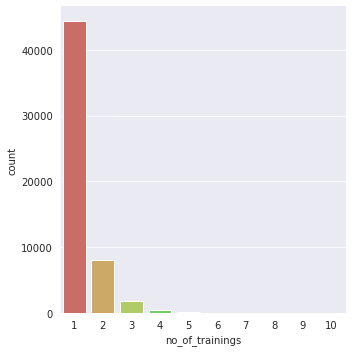

In [28]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='no_of_trainings', kind='count', data=train, palette='hls')
plt.show()

**Observation**
* Most of the employees have at least attended 1 training.

<Figure size 864x720 with 0 Axes>

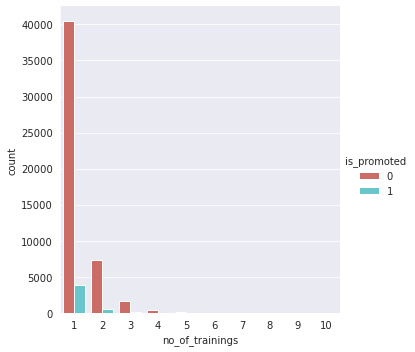

In [29]:
plt.figure(figsize=(12, 10))
sns.catplot(x='no_of_trainings', hue='is_promoted', kind='count', data=train,palette='hls')
plt.show()

In [30]:
train.groupby('no_of_trainings')['is_promoted'].sum()

no_of_trainings
1     3910
2      605
3      122
4       26
5        3
6        2
7        0
8        0
9        0
10       0
Name: is_promoted, dtype: int64

**Previous Year Rating**

<Figure size 864x576 with 0 Axes>

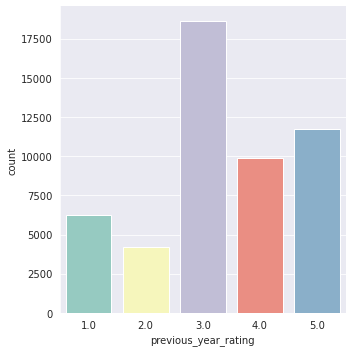

In [31]:
plt.figure(figsize=(12,8))
sns.catplot(x ='previous_year_rating', kind='count', data=train, palette='Set3')
plt.show()

**Observation**

* Most of the employees have been in the company for 3 years

<Figure size 864x720 with 0 Axes>

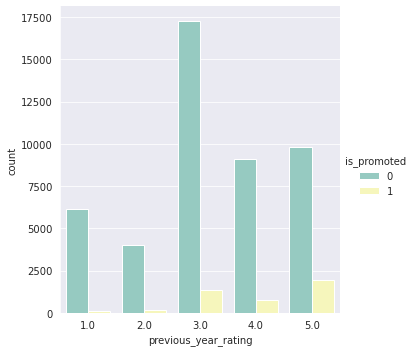

In [32]:
plt.figure(figsize=(12, 10))
sns.catplot(x='previous_year_rating', hue='is_promoted', kind='count', data=train, palette='Set3')
#plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


In [33]:
train.groupby('previous_year_rating')['is_promoted'].sum()

previous_year_rating
1.0      88
2.0     181
3.0    1355
4.0     784
5.0    1921
Name: is_promoted, dtype: int64

**Awards won**

<Figure size 864x720 with 0 Axes>

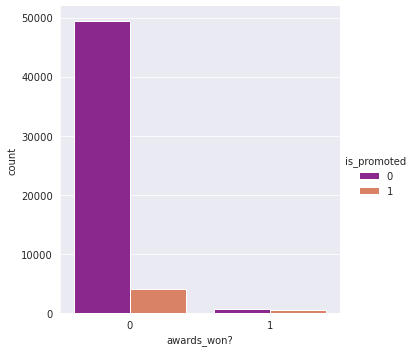

In [34]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='awards_won?',hue='is_promoted', kind='count', data=train, palette='plasma')
plt.show()

In [35]:
train.groupby('awards_won?')['is_promoted'].sum()

awards_won?
0    4109
1     559
Name: is_promoted, dtype: int64

**Region**

<Figure size 864x720 with 0 Axes>

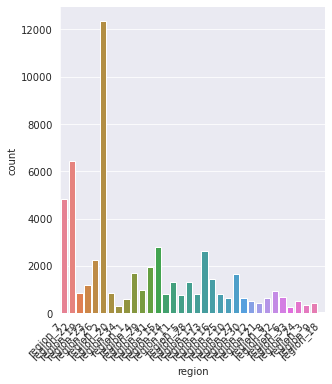

In [36]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='region', kind='count', data=train, palette='husl')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<Figure size 864x720 with 0 Axes>

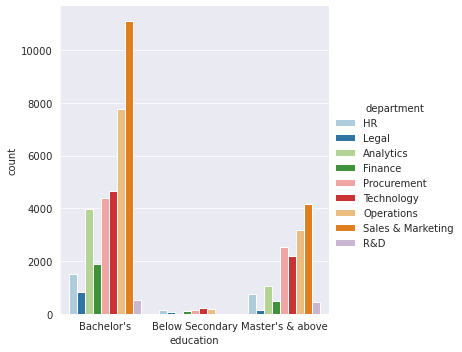

In [37]:
train_sort = train.sort_values('education')
plt.figure(figsize=(12, 10))
sns.catplot(x ='education', hue='department', kind='count', data=train_sort, palette='Paired')
plt.show()

**Observation**

Employees from sales & marketing department have a bachelor's degree

<Figure size 864x720 with 0 Axes>

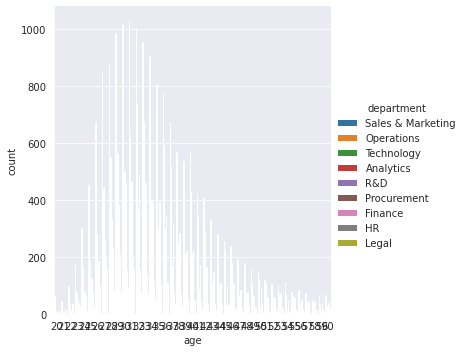

In [38]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='age', hue='department', kind='count', data=train)
plt.show()

<Figure size 864x720 with 0 Axes>

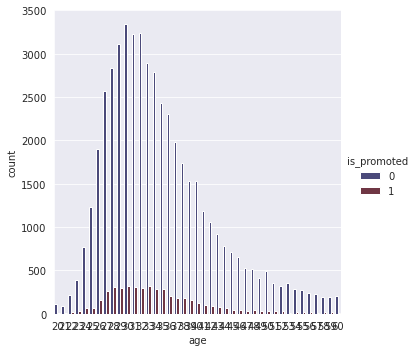

In [39]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='age', hue='is_promoted', kind='count', data=train, palette='icefire')
plt.show()

<Figure size 864x720 with 0 Axes>

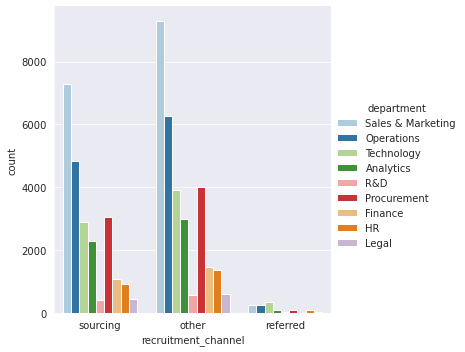

In [40]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='recruitment_channel', hue='department', kind='count', data=train, palette='Paired')
plt.show()

Most sales & marketing department employees are recruited through other recruitment channels

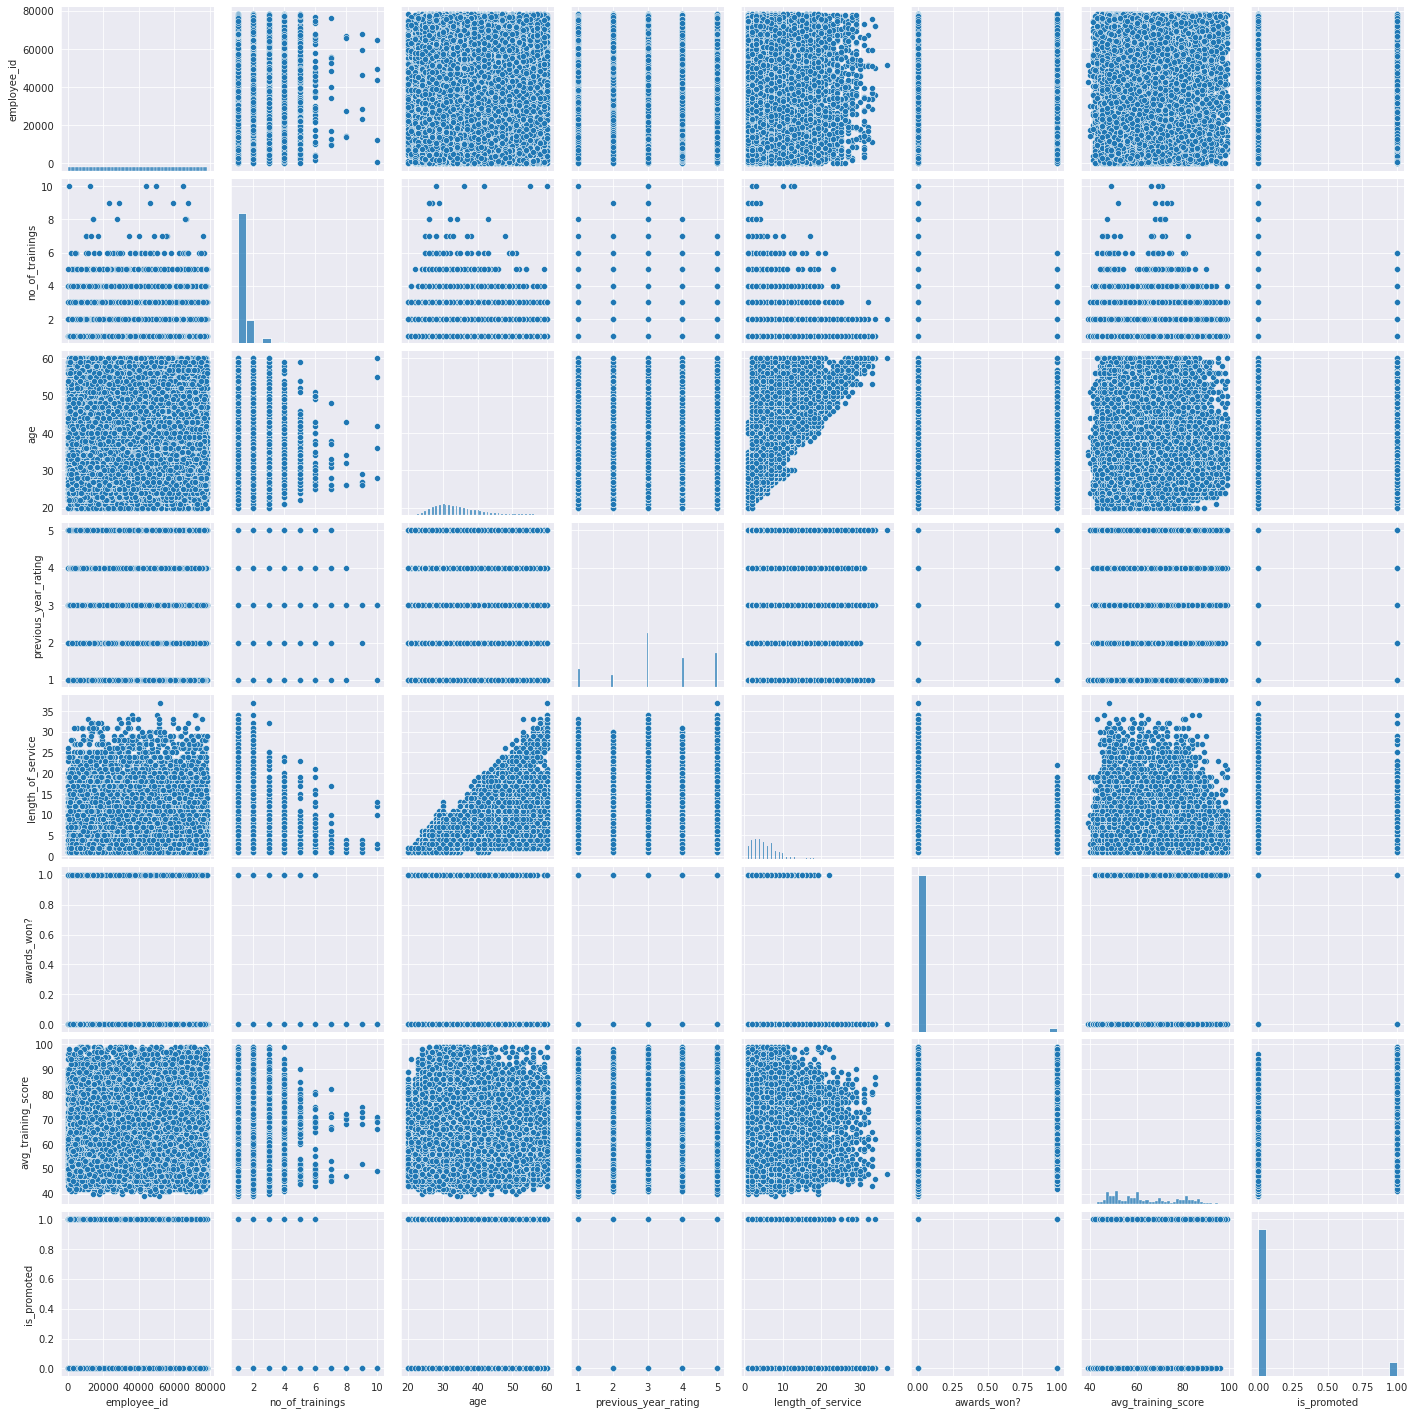

In [41]:
sns.pairplot(train)
plt.show()

# Data Cleaning

* Check for null values
* Rename columns
* Encode columns

**Renaming columns**

In [42]:
train.rename(columns = {'awards_won?':'awards_won'}, inplace = True)

train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [43]:
test.rename(columns = {'awards_won?':'awards_won'}, inplace = True)

test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score'],
      dtype='object')

**Null values**

In [44]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [45]:
(train.isnull().mean())*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [46]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won                 0
avg_training_score         0
dtype: int64

In [47]:
#Percentage of null values in test dataset
(test.isnull().mean())*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
awards_won              0.000000
avg_training_score      0.000000
dtype: float64

**Handle null values**

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
impute = SimpleImputer(strategy='median')
train['previous_year_rating']=impute.fit_transform(train[['previous_year_rating']])
test['previous_year_rating']=impute.fit_transform(test[['previous_year_rating']])

In [50]:
impute1 = SimpleImputer(strategy='most_frequent')
train['education']=impute1.fit_transform(train[['education']])
test['education']=impute1.fit_transform(test[['education']])

**Dropping column**

In [51]:
df_train = train.drop('employee_id',1)
df_test = test.drop('employee_id',1)

**One Hot Encoding**

In [52]:
#Encoding columns, train data
train_cat = df_train.select_dtypes(include=['object']).columns
train = pd.get_dummies(df_train, drop_first=True, columns=train_cat)
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,73,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
#Encoding columns, test data
test_cat = df_test.select_dtypes(include=['object']).columns
test = pd.get_dummies(df_test, drop_first=True, columns=test_cat)
test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,0,77,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,31,3.0,5,0,51,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,47,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,31,2.0,9,0,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,30,4.0,7,0,61,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# Modelling

In [54]:
#Import ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import plot_confusion_matrix

In [55]:
#Defining independent and dependent variables
X = train.drop('is_promoted', axis=1)
y = train.is_promoted
X.shape, y.shape

((54808, 52), (54808,))

**SMOTE()**
The dataset is imbalanced, so we use SMOTE() to balance the dataset


In [56]:
#Resampling
X_res, y_res  = SMOTE().fit_resample(X, y.values.ravel())

In [57]:
#Train test split
X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

In [58]:
#StandardScaler follows Standard Normal Distribution (SND). 
#It makes mean = 0 and scales the data to unit variance.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
test = sc.transform(test)

### **Logistic Regression Model**

In [59]:
#Logistic Regression model
log_model = LogisticRegression() #Define
log_model.fit(X_train, y_train) #fit
predict = log_model.predict(X_valid) #predict

In [60]:
print("Train data Accuracy :", log_model.score(X_train, y_train))
print("Test data Accuracy :", log_model.score(X_valid, y_valid))

Train data Accuracy : 0.8808051740839934
Test data Accuracy : 0.8764459513362585


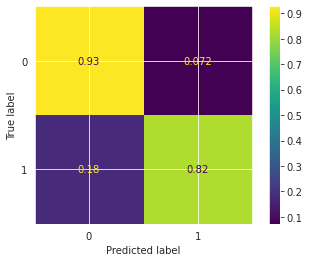

In [61]:
plot_confusion_matrix(log_model,X_valid, y_valid,normalize='true')

In [62]:
print(classification_report(y_valid, predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     15186
           1       0.92      0.82      0.87     14898

    accuracy                           0.88     30084
   macro avg       0.88      0.88      0.88     30084
weighted avg       0.88      0.88      0.88     30084



**Observations**
* Precision:- Out of all the employees that the model predicted would get promoted, only 92% actually did.
* Recall:- Out of all the employees that actually did get promoted, the model only predicted this outcome correctly for 83% of those employees.
* F1 Score: The model predicted an 87% chance of employees being promoted 
* Support:- Among the employees in the test dataset, 15186 did not get promoted and 14898 did get promoted.

**GridSearchCv()**
* This is a tuning technique that attempts to compute the optimum values od hyperparameters

### **Decision Tree Model**

In [63]:
max_depth_range = np.arange(1, 40)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range}]
clf_tree = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5, scoring='f1_weighted')
clf_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])}],
             scoring='f1_weighted')

In [64]:
clf_tree.best_params_

{'criterion': 'entropy', 'max_depth': 39}

In [65]:
tree_model=DecisionTreeClassifier(criterion='entropy', max_depth=39)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=39)

In [66]:
tree_pred = tree_model.predict(X_valid)

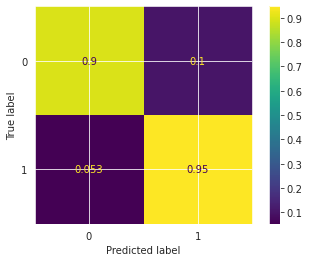

In [67]:
plot_confusion_matrix(tree_model,X_valid, y_valid,normalize='true')

In [68]:
print("Train data Accuracy :", tree_model.score(X_train, y_train))
print("Test data Accuracy :", tree_model.score(X_valid, y_valid))

Train data Accuracy : 0.9926918912758562
Test data Accuracy : 0.9211873421087622


In [69]:
print(classification_report(y_valid, tree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     15186
           1       0.90      0.95      0.92     14898

    accuracy                           0.92     30084
   macro avg       0.92      0.92      0.92     30084
weighted avg       0.92      0.92      0.92     30084



**Observations**
* Precision:- Out of all the employees that the model predicted would get promoted, only 89% actually did.
* Recall:- Out of all the employees that actually did get promoted, the model only predicted this outcome correctly for 95% of those employees.
* F1 Score: The model predicted a 92% chance of employees being promoted 
* Support:- Among the employees in the test dataset, 15186 did not get promoted and 14898 did get promoted.

### **RandomForest Model**

In [70]:
rf_model = RandomForestClassifier(random_state=1)
max_depth_range = np.arange(1, 40)
rf_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range}]
clf_rf = GridSearchCV(rf_model, rf_param, cv= 5,scoring='f1_weighted')
clf_rf.fit(X_train, y_train) 


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])}],
             scoring='f1_weighted')

In [71]:
clf_rf.best_params_

{'criterion': 'entropy', 'max_depth': 39}

In [72]:
rf_model=RandomForestClassifier(criterion='gini',max_depth=39)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=39)

In [73]:
rf_pred=rf_model.predict(X_valid)

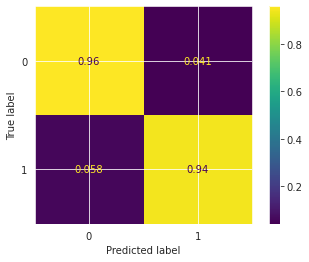

In [74]:
plot_confusion_matrix(rf_model,X_valid, y_valid,normalize='true')

In [75]:
print("Train data Accuracy :", rf_model.score(X_train, y_train))
print("Test data Accuracy :", rf_model.score(X_valid, y_valid))

Train data Accuracy : 0.9962533477691037
Test data Accuracy : 0.9504720117005717


In [76]:
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15186
           1       0.96      0.94      0.95     14898

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084



**Observations**
* Precision:- Out of all the employees that the model predicted would get promoted, only 96% actually did.
* Recall:- Out of all the employees that actually did get promoted, the model only predicted this outcome correctly for 94% of those employees.
* F1 Score: The model predicted an 95% chance of employees being promoted 
* Support:- Among the employees in the test dataset, 15186 did not get promoted and 14898 did get promoted.

### **Importance of features**

In [77]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X_res, y_res)
feat_importances = pd.Series(importances, train.columns[0:len(train.columns)-1])
feat_importances

no_of_trainings                 0.024220
age                             0.005725
previous_year_rating            0.205045
length_of_service               0.002668
awards_won                      0.003658
avg_training_score              0.066245
is_promoted                     0.006575
department_Finance              0.005760
department_HR                   0.003203
department_Legal                0.003728
department_Operations           0.001297
department_Procurement          0.003657
department_R&D                  0.006757
department_Sales & Marketing    0.000000
department_Technology           0.001744
region_region_10                0.006507
region_region_11                0.000000
region_region_12                0.008455
region_region_13                0.004876
region_region_14                0.005930
region_region_15                0.004639
region_region_16                0.000227
region_region_17                0.000243
region_region_18                0.002595
region_region_19

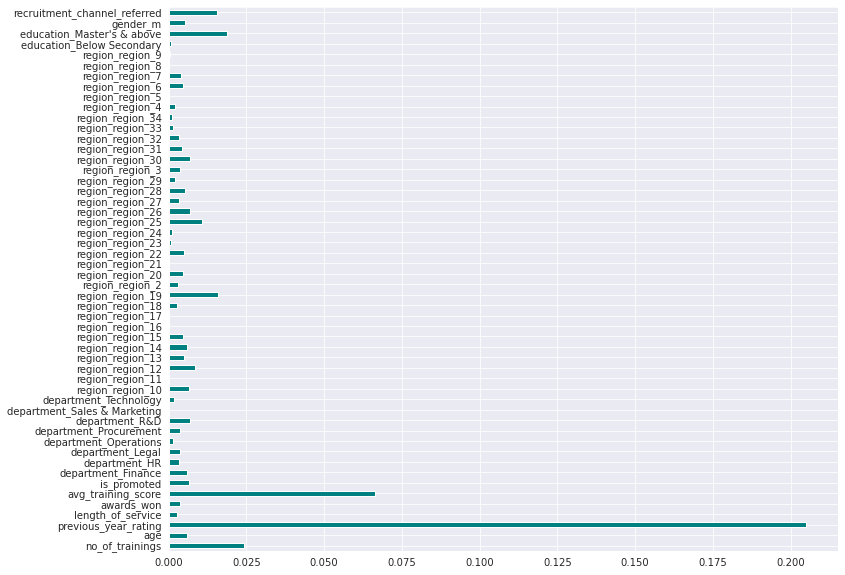

In [78]:
plt.figure(figsize=(12, 10))
feat_importances.plot(kind='barh', color='teal')
plt.show()

 **Observation**

* Top 3 factors that drive promotion:
1.       Previous year rating
1.       Average training score
1.       Number of trainings
 